## Facebook user estimation over next five years

**Facebook is the biggest social network company in the world. The number of user growth is one of the most significant metrics for stakeholders. The company disclose number of users in four regions( US and Canada, Europe, Asia and Pacific, Rest of World ) quarterly.
In the last half year, Facebook stock price has experienced two sharp falls because of market concerns about user growth(one by Cambridge Analytica scandal, the other by General Data Protection Regulation (GDPR) compliance).**

## Table of Content

&#8195;[**1. Libraries and Dependencies**](#libraries)<br>
&#8195;[**2. Datasets**](#datasets)<br>
&#8195;[**3. Content**](#content)<br>
>[**1. How people's leisure time change?**](#content)<br>
>[**2. How we spend leisure time change?**](#spend)<br>
>[**3. Which social platform might benefit most?**](#benefit)<br>
>[**4. How I simulate user growth?**](#simulate)<br>
>[**5. Estimation Results**](#result)<br>

<a id='libraries'></a> 
### Libraries and Dependencies

I used python(pandas, numpy, seaborn and matplotlib) as my main technical tools.

In [372]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from matplotlib import pylab
import scipy.optimize as optimization
import matplotlib.ticker as tick
from IPython.core.display import Image, display;

Articles link to this theme:<br>
https://www.nytimes.com/2018/03/19/technology/facebook-cambridge-analytica-explained.html <br>
https://qz.com/1234414/should-you-delete-facebook-what-are-the-alternatives/

- Background Knowledge: <br>
<br>
Daily Active User(DAU): Facebook defines a daily active user as a registered Facebook user who logged in and visited Facebook through Facebook website or a mobile device, or used facebook Messenger application (and is also a registered Facebook user), on a given day. <br>
<br>
The definition of DAU by Facebook is relatively more strict in social network industry. 

<a id='datasets'></a> 
### Datasets

I download the leisure time data from department of labor website,collect user data manually from Facebook, Twitter and Snapchat's public report. I also collect population data from website. http://www.worldometers.info/world-population/northern-america-population/ I exclude China population from Asia and Pacific region because Facebook is inaccessible in China.

In [373]:
leisure_time = pd.read_csv('SeriesReport-20180828111900_e0dd15.csv')

In [374]:
time_electrical_device = pd.read_csv('Time spent on electrical devices.csv', index_col=0)

In [375]:
user_platform = pd.read_csv('active users of global social platforms.csv', index_col=0)
user_platform = user_platform.drop(['YY',"QQ",'Reddit','Line','FB Messenger','Whatsapp'])

In [376]:
user_platform_major = pd.read_csv('users number of social networlk platform.csv', index_col=0)

In [377]:
data_dau = pd.read_csv('FB DAU&MAU.csv', index_col=0)
data_pop = pd.read_csv('World Population.csv', index_col=0)

<a id='content'></a> 
## Content
## 1. How people's leisure time change?

The number of hours of American's leisure time is from 5.11 in 2003 to 5.24 in 2017. We can clearly tell from the plot that our leisure time increases as time pass by.

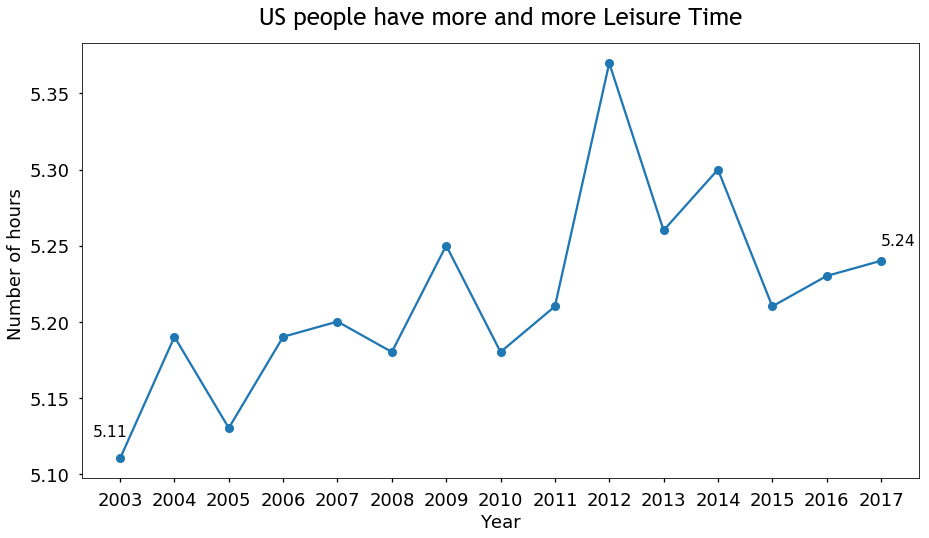

In [378]:
csfont = {'fontname':'Trebuchet MS'}

plt.figure(figsize=(15,8))
sns.set_context('talk')

plt.plot(leisure_time['Year'],leisure_time['Estimate'],'-o')
plt.xticks(leisure_time['Year'])
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of hours ", fontsize = 18)
plt.title("US people have more and more Leisure Time", **csfont, fontsize = 24, y = 1.03)
plt.text(2002.5, leisure_time['Estimate'][0]+0.015, str(leisure_time['Estimate'][0]))
plt.text(2017, leisure_time['Estimate'][14]+0.01, str(leisure_time['Estimate'][14]))
ax=plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.grid(False);

<a id='spend'></a> 
## 2. How we spend leisure time?

We can tell from the plot that US adults are spending longer and longer on electronics.

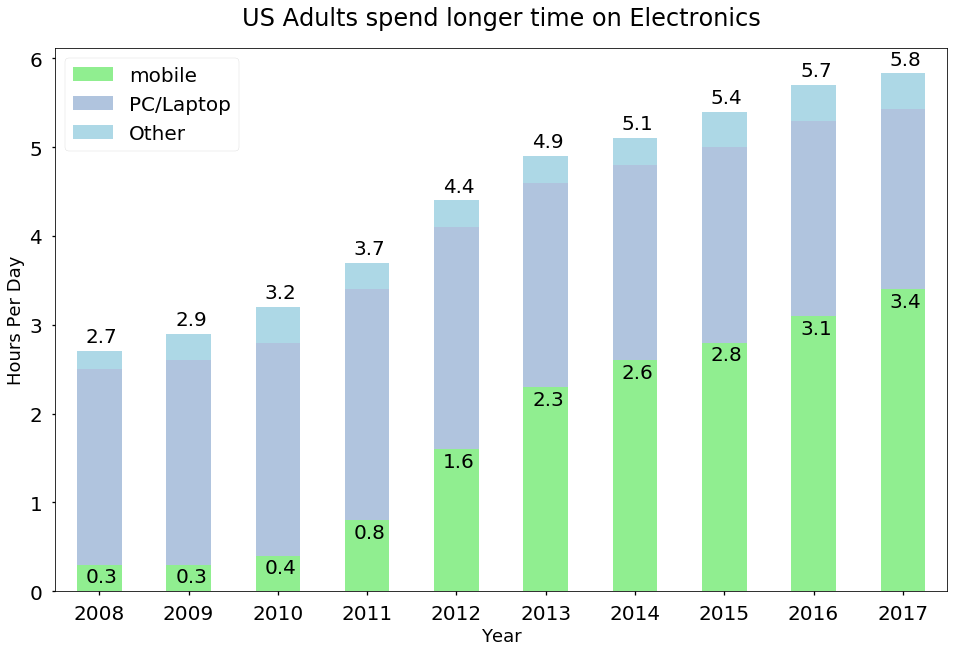

In [379]:
ax = time_electrical_device.plot.bar(stacked=True, color = (
    'lightgreen','lightsteelblue','lightblue'),figsize=(16,10))
plt.xticks(rotation=0)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
plt.xlabel("Year",fontsize=18)
plt.ylabel("Hours Per Day", fontsize=18)
plt.legend(fontsize=20)
plt.title("US Adults spend longer time on Electronics", fontsize = 24,y = 1.03)
bottom = np.cumsum(time_electrical_device.T, axis=0)
for i, v in enumerate(time_electrical_device.iloc[:,0]):
    ax.text(i-0.15, v-0.2, str(v),fontsize=20)
# for i, v in enumerate(time_electrical_device.iloc[:,1]):
#     ax.text(i-0.1, v+bottom.iloc[0,i]-0.2, str(v),fontsize=12)
# for i, v in enumerate(time_electrical_device.iloc[:,2]):
#     ax.text(i-0.1, v+bottom.iloc[1,i]-0.2, str(v),fontsize=12)
for i, v in enumerate(bottom.iloc[2,:]):
    ax.text(i-0.15, v+0.1, str(round(v,1)),fontsize=20)

<a id='benefit'></a> 
## 3. Which social platform might benefit most?

Perspective 1: User Base

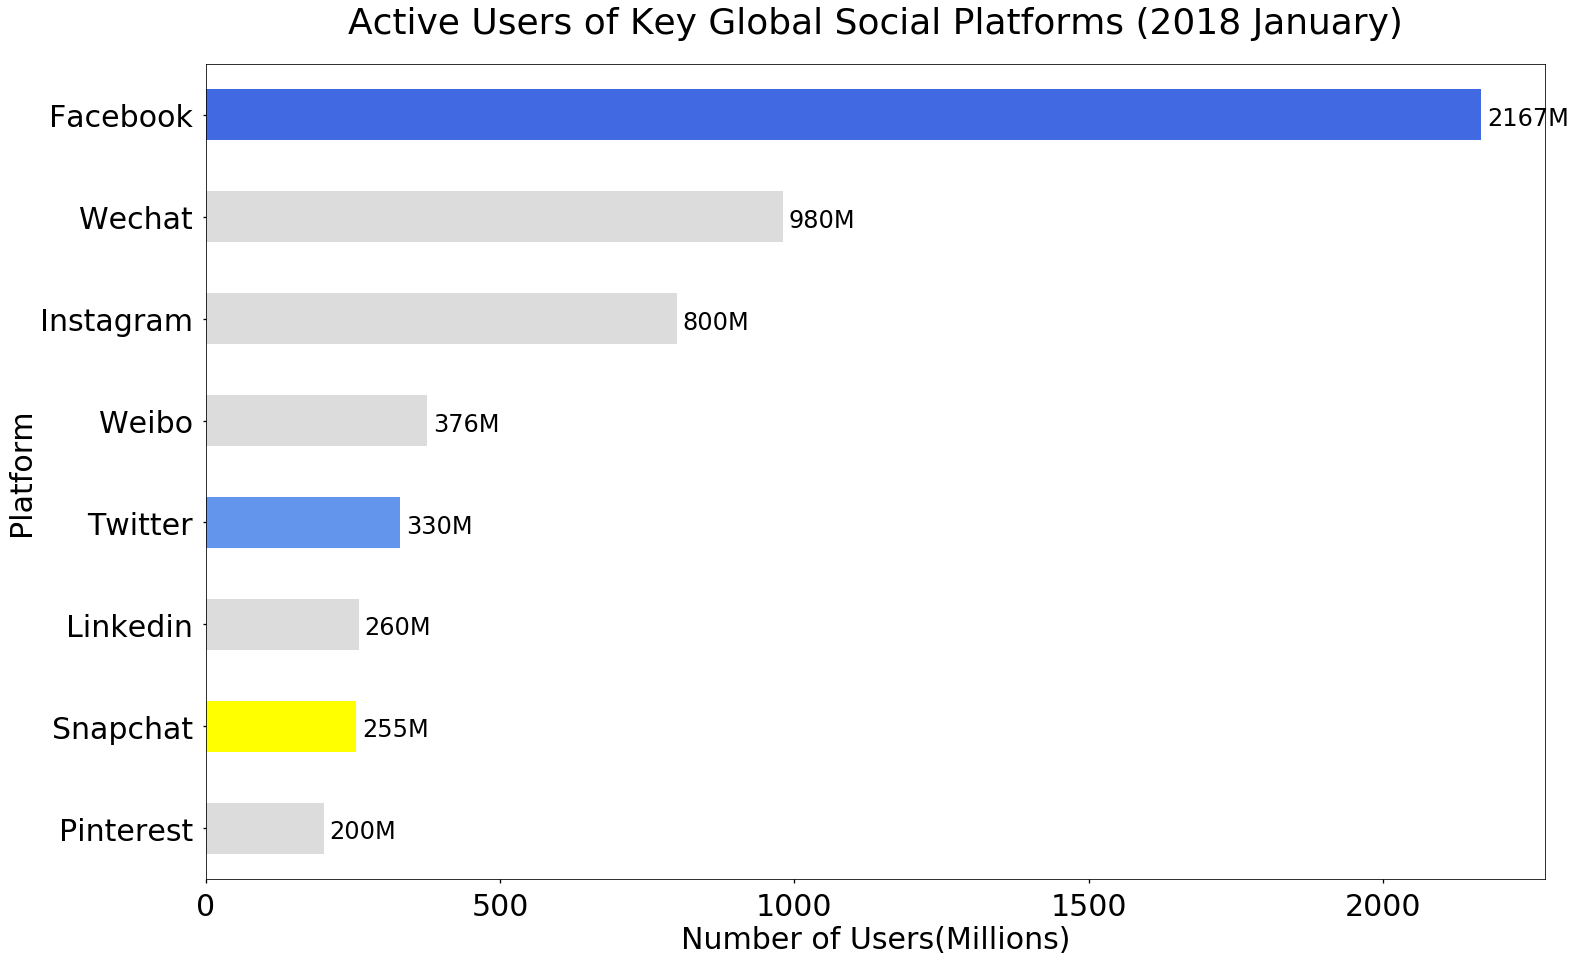

In [380]:
ax = user_platform.sort_values(by='Number').plot.barh(
    color='gainsboro', figsize=(24,15), legend=None)
plt.xlabel("Number of Users(Millions)",fontsize=30)
plt.ylabel("Platform",fontsize=30)
plt.title("Active Users of Key Global Social Platforms (2018 January)", fontsize=36, y = 1.03)
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.patches[user_platform.index.get_loc('Pinterest')].set_facecolor('royalblue')
ax.patches[user_platform.index.get_loc('Wechat')].set_facecolor('yellow')
ax.patches[user_platform.index.get_loc('Weibo')].set_facecolor('cornflowerblue')
for i, v in enumerate(user_platform.iloc[:,0].sort_values()):
    ax.text(v+10, i-0.1, str(v)+'M',fontsize=24);

Perspective 2: New User Acquisition Rate

In [381]:
new_users_platform = user_platform_major.diff(axis=1)
new_users_platform

,Q2'16,Q3'16,Q4'16,Q1'17,Q2'17,Q3'17,Q4'17,Q1'18,Q2'18
Facebook,NaN,51.0,47.0,58.0,42.0,42.0,33.0,48.0,22.0
Twitter,NaN,4.0,1.0,9.0,-1.0,4.0,0.0,6.0,-1.0
Snapchat,NaN,10.0,5.0,8.0,7.0,5.0,9.0,4.0,-3.0


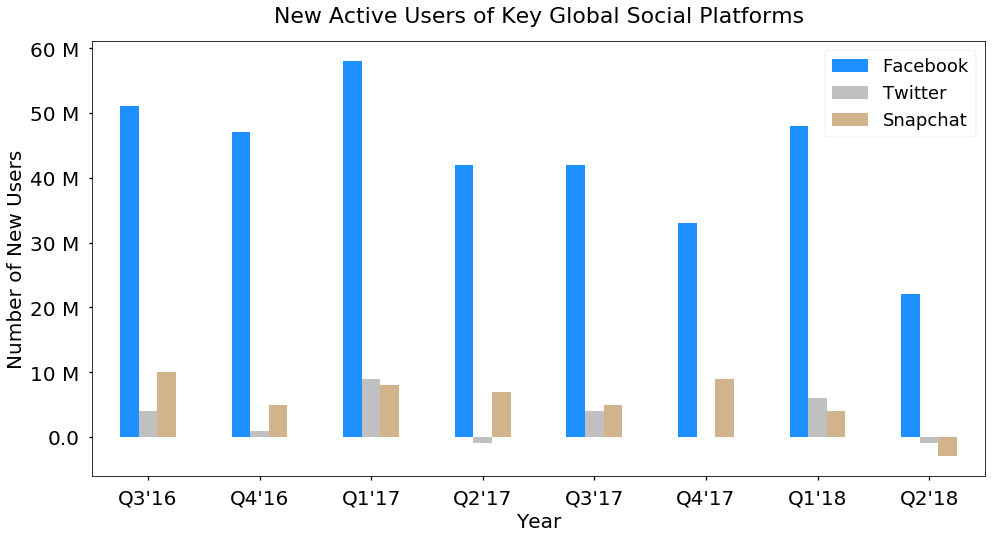

In [382]:
def y_fmt(tick_val, pos):
    if tick_val > 1:
        val = int(tick_val)
        return '{:d} M'.format(val)
    else:
        return tick_val
    
ax = new_users_platform.iloc[:,1:].T.plot.bar(figsize=(16,8),color = ('dodgerblue','silver','tan'))
plt.xticks(rotation=0)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of New Users",fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
plt.legend(fontsize=18)
plt.title("New Active Users of Key Global Social Platforms", fontsize=22, y = 1.03);

<a id='simulate'></a> 
## 4. How I simulate users growth?

### 4.1 My understanding of Facebook user growth in the next 5 years

- Based on improving algorithm and data scientists' research, user experience gets better and better.
- Social network has a special attribute: the more connected people in this network, the easier to join, and the harder to leave.
- In most part of world, Facebook has no similar size opponent and no scalable competition.

### 4.2 Two stages of user growth simulation

Based on my understanding of Facebook user growth, I divide the user growth into two stages.

> **4.2.1 User growth before saturation**<br>
Users increase very fast at the beginning, and acceleration slows down when the user base becomes bigger and bigger, and then stagnates at the peak. This user acquisition pace seems perfectly fit the left part of open faced two degree polynomial curve. The basic function is: <br>
$y=b\left(x-a\right)^2+c$ <br>
In this equation, a is the limit time, and c is limit peak, b determines the user increase rate.<br>
If we go further with the equation: <br>
$y=bx^2-2abx+ba^2+c$

##### > **4.2.2 User growth after saturation**<br>
When users increase stagnates, the popularization rate stay same, and the user increases as the population increases naturally. So I calculate the users number as popularization rate times the whole population.

### 4.3 Some assumptions based on consideration of reality factors

- The US and Canada market is saturated now in terms of number of users. The popularization rate is really high(More than half of the population are Facebook users).
- The Europe, Asia and Pacific and Rest of World market are still not saturated. I assume they will reach saturation at the end of 2021(three years from now). The assumption I made here may be not accurate but reasonable.
- I also assume that the popularization rate in Europe, Asia and Pacific and Rest of World after saturation will be lower than one in US and Canada by 10%, 30%, 25%. The assumption I made here is conservative.

### 4.4 User Acquisition Curve by Region Market

In [333]:
data_dau

,Q2'11,Q3'11,Q4'11,Q1'12,Q2'12,Q3'12,Q4'12,Q1'13,Q2'13,Q3'13,...,Q1'16,Q2'16,Q3'16,Q4'16,Q1'17,Q2'17,Q3'17,Q4'17,Q1'18,Q2'18
Region,,,,,,,,,,,,,,,,,,,,,
US & Canada,117,124,126,129,130,132,135,139,142,144,...,173,175,178,180,182,183,185,184,185,185
Europe,127,135,143,152,154,160,169,179,182,188,...,249,252,256,262,267,271,274,277,282,279
Asia-Pacific,85,98,105,119,129,141,153,167,181,189,...,329,346,368,396,427,453,476,499,529,546
Rest of World,87,100,109,126,139,152,161,180,195,208,...,340,355,377,388,408,419,433,441,453,461


In [334]:
data_pop

,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,Growth Rate
Region,,,,,,,,,,,,
US & Canada,363,365.541,368.099787,370.676486,373.271221,375.884119,378.515308,381.164915,383.833070,386.519901,389.225541,0.007
Europe,743,743.743,744.486743,745.231230,745.976461,746.722437,747.469160,748.216629,748.964846,749.713811,750.463524,0.001
Asia-Pacific_exclude_China,3174,3214.236,3254.908344,3296.021531,3337.580107,3379.588662,3422.051833,3464.974305,3508.360811,3552.216128,3596.545085,0.010
Rest of World,1944,1967.328,1990.935936,2014.827167,2039.005093,2063.473154,2088.234832,2113.293650,2138.653174,2164.317012,2190.288816,0.012
China,1416,1421.664,1427.350656,1433.060059,1438.792299,1444.547468,1450.325658,1456.126961,1461.951468,1467.799274,1473.670471,0.004
Asia-Pacific,4590,4635.900,4682.259000,4729.081590,4776.372406,4824.136130,4872.377491,4921.101266,4970.312279,5020.015402,5070.215556,0.010


### US and Canada market

More than half of population in US and Canada Market are already Facebook daily active users.

In [335]:
user_US_Canada = data_dau.iloc[0]
pop_US_Canada = data_pop.iloc[0,0:-1]
ratio_ceiling_US_Canada = data_dau.iloc[0,-1] / data_pop.iloc[0,0]
ratio_ceiling_US_Canada

0.509641873278237

build a fit function for US and Canada

In [336]:
time_saturate_US_Canada = 2018.5 
def func_US(x,b):
    return b*x*x-2*time_saturate_US_Canada*b*x+b*time_saturate_US_Canada*time_saturate_US_Canada+user_US_Canada[-1]

fit the curve for first stage

In [337]:
time = np.linspace(2011.5,2018.5,29)
user_estimate_US_Canada_before2018 = func_US(np.linspace(2011,2017,7),optimization.curve_fit(
    func_US,time,user_US_Canada)[0])
user_estimate_US_Canada_before2018

array([ 97.53604875, 119.3048544 , 137.96383066, 153.51297755,
       165.95229506, 175.28178319, 181.50144195])

fit the curve for second stage

In [338]:
user_estimate_US_Canada_after2018 = (pop_US_Canada*ratio_ceiling_US_Canada).values
user_estimate_US_Canada_after2018

array([185.        , 186.295     , 187.599065  , 188.91225845,
       190.23464426, 191.5662868 , 192.90725079, 194.25760151,
       195.61740477, 196.98672656, 198.36563369])

combine into one estimate data

In [339]:
user_estimate_US_Canada = np.append(user_estimate_US_Canada_before2018,user_estimate_US_Canada_after2018)
user_estimate_US_Canada

array([ 97.53604875, 119.3048544 , 137.96383066, 153.51297755,
       165.95229506, 175.28178319, 181.50144195, 185.        ,
       186.295     , 187.599065  , 188.91225845, 190.23464426,
       191.5662868 , 192.90725079, 194.25760151, 195.61740477,
       196.98672656, 198.36563369])

### Europe market

I assume the saturation rate in Europe would be 10% lower than one in US and Canada market.

In [340]:
user_Europe = data_dau.iloc[1]
pop_Europe = data_pop.iloc[1,0:-1]
ratio_ceiling_Europe = ratio_ceiling_US_Canada - 0.1
ratio_ceiling_Europe

0.409641873278237

Calculate the peak point for first stage

In [341]:
user_peak_Europe = pop_Europe['2021'] * ratio_ceiling_Europe
user_Europe["Q4'21"] = user_peak_Europe
user_peak_Europe

305.2779169597521

build a fit function for Europe

In [342]:
time_saturate = 2022
def func_Europe(x,b):
    return b*x*x-2*time_saturate*b*x+b*time_saturate*time_saturate+user_peak_Europe

fit the curve for first stage

In [343]:
time_adjusted = np.append(time,2022)
user_estimate_Europe_before2021 = func_Europe(np.linspace(2011,2021,11),optimization.curve_fit(
    func_Europe,time_adjusted,user_Europe)[0])
user_estimate_Europe_before2021

array([102.05323711, 137.3236361 , 169.23494946, 197.78717721,
       222.98031934, 244.81437585, 263.28934674, 278.40523202,
       290.16203168, 298.55974572, 303.59837415])

fit the curve for second stage

In [344]:
user_estimate_Europe_after2021 = (pop_Europe[4:]*ratio_ceiling_Europe).values
user_estimate_Europe_after2021

array([305.58319491, 305.88877808, 306.19466688, 306.50086152,
       306.80736241, 307.11416976, 307.42128392])

combine into one estimate data

In [345]:
user_estimate_Europe = np.append(user_estimate_Europe_before2021,user_estimate_Europe_after2021)
user_estimate_Europe

array([102.05323711, 137.3236361 , 169.23494946, 197.78717721,
       222.98031934, 244.81437585, 263.28934674, 278.40523202,
       290.16203168, 298.55974572, 303.59837415, 305.58319491,
       305.88877808, 306.19466688, 306.50086152, 306.80736241,
       307.11416976, 307.42128392])

### Asia and Pacific market (exclude China)

I assume the saturation rate in Asia and Pacific would be 30% lower than one in US and Canada market, as well as exclude China population from Asia and Pacific population. The reasons includes China has not accepted Facebook and there are more competition in this market.

In [346]:
user_Asia_Pacific = data_dau.iloc[2]
pop_Asia_Pacific_exclude_china = data_pop.iloc[2,0:-1]
ratio_ceiling_Asia_Pacific = ratio_ceiling_US_Canada - 0.3
ratio_ceiling_Asia_Pacific

0.20964187327823697

Calculate the peak point for first stage

In [347]:
user_peak_Asia_Pacific = pop_Asia_Pacific_exclude_china['2021'] * ratio_ceiling_Asia_Pacific
user_Asia_Pacific["Q4'21"] = user_peak_Asia_Pacific

build a fit function for Asia and Pacific Area

In [348]:
def func_Asia_Pacific(x,b):
    return b*x*x-2*time_saturate*b*x+b*time_saturate*time_saturate+user_peak_Asia_Pacific

fit the curve for first stage

In [349]:
user_estimate_Asia_Pacific_before2021 = func_Asia_Pacific(np.linspace(2011,2021,11),optimization.curve_fit(
    func_Asia_Pacific,time_adjusted,user_Asia_Pacific)[0])
user_estimate_Asia_Pacific_before2021

array([-151.47616292,   -5.26404629,  127.02310685,  245.3852965 ,
        349.82252266,  440.33478534,  516.92208452,  579.58442022,
        628.32179243,  663.13420115,  684.02164638])

fit the curve for second stage

In [350]:
user_estimate_Asia_Pacific_after2021 = (pop_Asia_Pacific_exclude_china[4:]*ratio_ceiling_Asia_Pacific).values
user_estimate_Asia_Pacific_after2021

array([699.69654585, 708.50329801, 717.40535673, 726.40370416,
       735.49933255, 744.69324336, 753.98644895])

combine into one estimate data

In [351]:
user_estimate_Asia_Pacific = np.append(user_estimate_Asia_Pacific_before2021,user_estimate_Asia_Pacific_after2021)
user_estimate_Asia_Pacific

array([-151.47616292,   -5.26404629,  127.02310685,  245.3852965 ,
        349.82252266,  440.33478534,  516.92208452,  579.58442022,
        628.32179243,  663.13420115,  684.02164638,  699.69654585,
        708.50329801,  717.40535673,  726.40370416,  735.49933255,
        744.69324336,  753.98644895])

### Rest of World market

I assume the saturation rate in Rest of World would be 25% lower than one in US and Canada market

In [352]:
user_Rest_World = data_dau.iloc[3]
pop_Rest_World = data_pop.iloc[3,0:-1]
ratio_ceiling_Rest_World = ratio_ceiling_US_Canada - 0.25
ratio_ceiling_Rest_World

0.25964187327823696

Calculate the peak point for first stage

In [353]:
user_peak_Rest_World = pop_Rest_World['2021'] * ratio_ceiling_Rest_World
user_Rest_World["Q4'21"] = user_peak_Rest_World

build a fit function for Rest of World Area

In [354]:
def func_Rest_World(x,b):
    return b*x*x-2*time_saturate*b*x+b*time_saturate*time_saturate+user_peak_Rest_World

fit the curve for first stage

In [355]:
user_estimate_Rest_World_before2021 = func_Rest_World(np.linspace(2011,2021,11),optimization.curve_fit(
    func_Rest_World,time_adjusted,user_Rest_World)[0])
user_estimate_Rest_World_before2021

array([-17.88439459,  76.01127306, 160.96449618, 236.97527475,
       304.04360878, 362.16949829, 411.35294325, 451.59394366,
       482.89249955, 505.24861089, 518.6622777 ])

fit the curve for second stage

In [356]:
user_estimate_Rest_World_after2021 = (pop_Rest_World[4:]*ratio_ceiling_Rest_World).values
user_estimate_Rest_World_after2021

array([529.41110197, 535.76403516, 542.19320363, 548.69952207,
       555.28391639, 561.94732336, 568.69069121])

combine into one estimate data

In [357]:
user_estimate_Rest_World = np.append(user_estimate_Rest_World_before2021,user_estimate_Rest_World_after2021)
user_estimate_Rest_World

array([-17.88439459,  76.01127306, 160.96449618, 236.97527475,
       304.04360878, 362.16949829, 411.35294325, 451.59394366,
       482.89249955, 505.24861089, 518.6622777 , 529.41110197,
       535.76403516, 542.19320363, 548.69952207, 555.28391639,
       561.94732336, 568.69069121])

### Plot the four market estimation using subplots

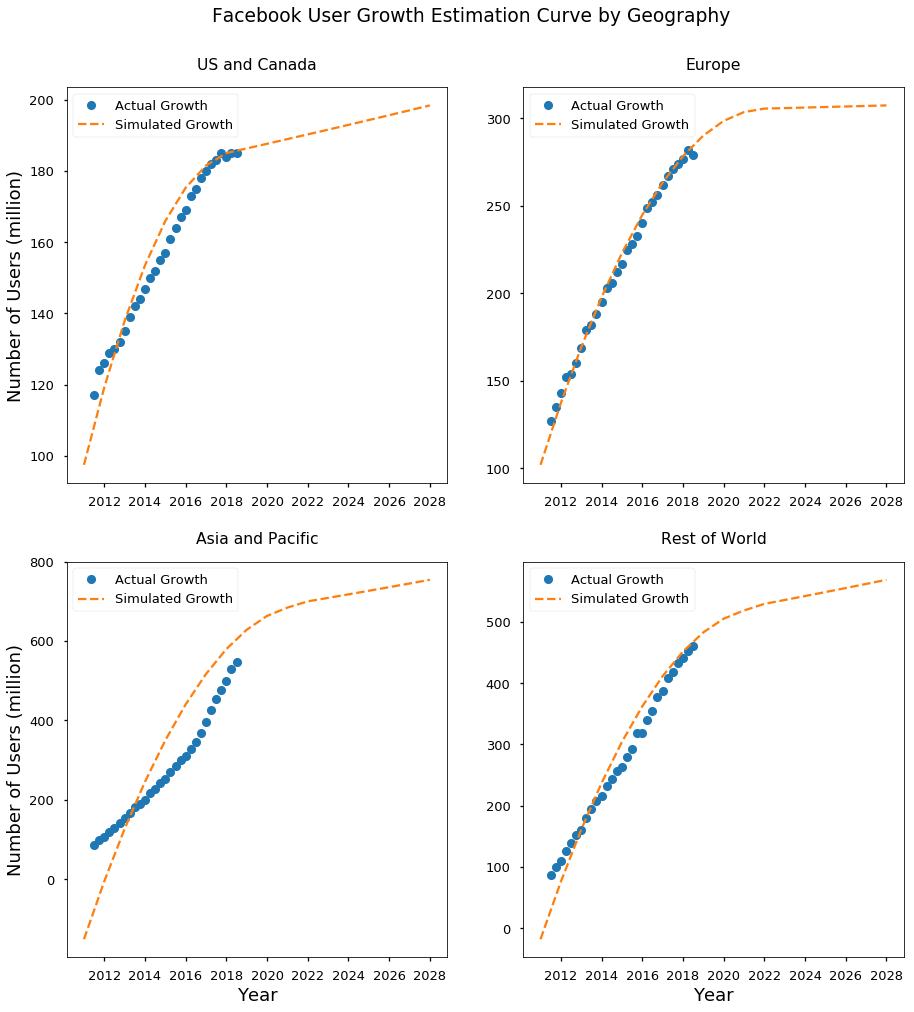

In [358]:
time = np.linspace(2011.5,2018.5,29)
time_extend = np.linspace(2011,2028,18)

plt.figure(figsize=(15,16))
sns.set_context('talk')

plt.subplot(221)
plt.plot(time,user_US_Canada,'o', label='Actual Growth')
plt.plot(time_extend, user_estimate_US_Canada, ls='--',label='Simulated Growth')
plt.legend()
plt.xticks([2012,2014,2016,2018,2020,2022,2024,2026,2028])
plt.ylabel("Number of Users (million)", fontsize = 18)
plt.title("US and Canada", y = 1.03);

user_Europe = data_dau.iloc[1]
plt.subplot(222)
plt.plot(time,user_Europe,'o', label='Actual Growth')
plt.plot(time_extend, user_estimate_Europe, ls='--',label='Simulated Growth')
plt.legend()
#plt.xlabel("Year")
#plt.ylabel("Number of Users (million)")
plt.xticks([2012,2014,2016,2018,2020,2022,2024,2026,2028])
plt.title("Europe", y = 1.03);

user_Asia_Pacific = data_dau.iloc[2]
plt.subplot(223)
plt.plot(time,user_Asia_Pacific,'o', label='Actual Growth')
plt.plot(time_extend, user_estimate_Asia_Pacific, ls='--',label='Simulated Growth')
plt.legend()
plt.xlabel("Year", fontsize = 18)
plt.ylabel("Number of Users (million)", fontsize = 18)
plt.xticks([2012,2014,2016,2018,2020,2022,2024,2026,2028])
plt.title("Asia and Pacific", y = 1.03);

user_Rest_World = data_dau.iloc[3]
plt.subplot(224)
plt.plot(time,user_Rest_World,'o', label='Actual Growth')
plt.plot(time_extend, user_estimate_Rest_World, ls='--',label='Simulated Growth')
plt.legend()
plt.xlabel("Year", fontsize = 18)
#plt.ylabel("Number of Users (million)")
plt.xticks([2012,2014,2016,2018,2020,2022,2024,2026,2028])
plt.title("Rest of World", y = 1.03)
plt.suptitle('Facebook User Growth Estimation Curve by Geography',y = 0.95);

* The possible reason that the orange curve doesn't fit well in plot 'Asia and Pacific' includes that I might be too consevative about the estimation of saturation rate and the peak year. Because this area has huge population and great economical potential, user growth may still at the early stage of parabola, and will be far beyond my estimated limit.

<a id='result'></a> 
### Estimation in next 5 years

Extract history data and estimate data in next 5 years

In [359]:
index = pd.Series(range(2,30,4))

user_US_Canada_combine = np.concatenate(
    (user_US_Canada[index].values, user_estimate_US_Canada_after2018[:6]), axis=None)
user_US_Canada_combine

user_estimate_Europe = np.concatenate(
    (user_estimate_Europe_before2021[7:], user_estimate_Europe_after2021[:2]), axis=None)
user_Europe_combine = np.concatenate(
    (user_Europe[index].values, user_estimate_Europe), axis=None)
user_Europe_combine

user_estimate_Asia_Pacific = np.concatenate(
    (user_estimate_Asia_Pacific_before2021[7:], user_estimate_Asia_Pacific_after2021[:2]), axis=None)
user_Asia_Pacific_combine = np.concatenate(
    (user_Asia_Pacific[index].values, user_estimate_Asia_Pacific), axis=None)
user_Asia_Pacific_combine

user_estimate_Rest_World = np.concatenate(
    (user_estimate_Rest_World_before2021[7:], user_estimate_Rest_World_after2021[:2]), axis=None)
user_Rest_World_combine = np.concatenate(
    (user_Rest_World[index].values, user_estimate_Rest_World), axis=None)
user_Rest_World_combine

array([109.        , 161.        , 216.        , 263.        ,
       319.        , 388.        , 441.        , 451.59394366,
       482.89249955, 505.24861089, 518.6622777 , 529.41110197,
       535.76403516])

In [360]:
time_year = pd.Series(range(2011,2024))
dataset = pd.DataFrame(user_US_Canada_combine.reshape(-1, len(user_US_Canada_combine)),columns=time_year)
dataset.loc[1] = user_Europe_combine
dataset.loc[2] = user_Asia_Pacific_combine
dataset.loc[3] = user_Rest_World_combine

dataset['Region'] = ['US and Canada','Europe','Asia and Pacifc','Rest of World']
dataset = dataset.set_index('Region')
dataset

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,
US and Canada,126.0,135.0,147.0,157.0,169.0,180.0,184.0,185.000000,186.295000,187.599065,188.912258,190.234644,191.566287
Europe,143.0,169.0,195.0,217.0,240.0,262.0,277.0,278.405232,290.162032,298.559746,303.598374,305.583195,305.888778
Asia and Pacifc,105.0,153.0,200.0,253.0,309.0,396.0,499.0,579.584420,628.321792,663.134201,684.021646,699.696546,708.503298
Rest of World,109.0,161.0,216.0,263.0,319.0,388.0,441.0,451.593944,482.892500,505.248611,518.662278,529.411102,535.764035


In [361]:
bottom = np.cumsum(dataset, axis=0)
bottom

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,
US and Canada,126.0,135.0,147.0,157.0,169.0,180.0,184.0,185.000000,186.295000,187.599065,188.912258,190.234644,191.566287
Europe,269.0,304.0,342.0,374.0,409.0,442.0,461.0,463.405232,476.457032,486.158811,492.510633,495.817839,497.455065
Asia and Pacifc,374.0,457.0,542.0,627.0,718.0,838.0,960.0,1042.989652,1104.778824,1149.293012,1176.532279,1195.514385,1205.958363
Rest of World,483.0,618.0,758.0,890.0,1037.0,1226.0,1401.0,1494.583596,1587.671324,1654.541623,1695.194557,1724.925487,1741.722398


In [362]:
bottom

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Region,,,,,,,,,,,,,
US and Canada,126.0,135.0,147.0,157.0,169.0,180.0,184.0,185.000000,186.295000,187.599065,188.912258,190.234644,191.566287
Europe,269.0,304.0,342.0,374.0,409.0,442.0,461.0,463.405232,476.457032,486.158811,492.510633,495.817839,497.455065
Asia and Pacifc,374.0,457.0,542.0,627.0,718.0,838.0,960.0,1042.989652,1104.778824,1149.293012,1176.532279,1195.514385,1205.958363
Rest of World,483.0,618.0,758.0,890.0,1037.0,1226.0,1401.0,1494.583596,1587.671324,1654.541623,1695.194557,1724.925487,1741.722398


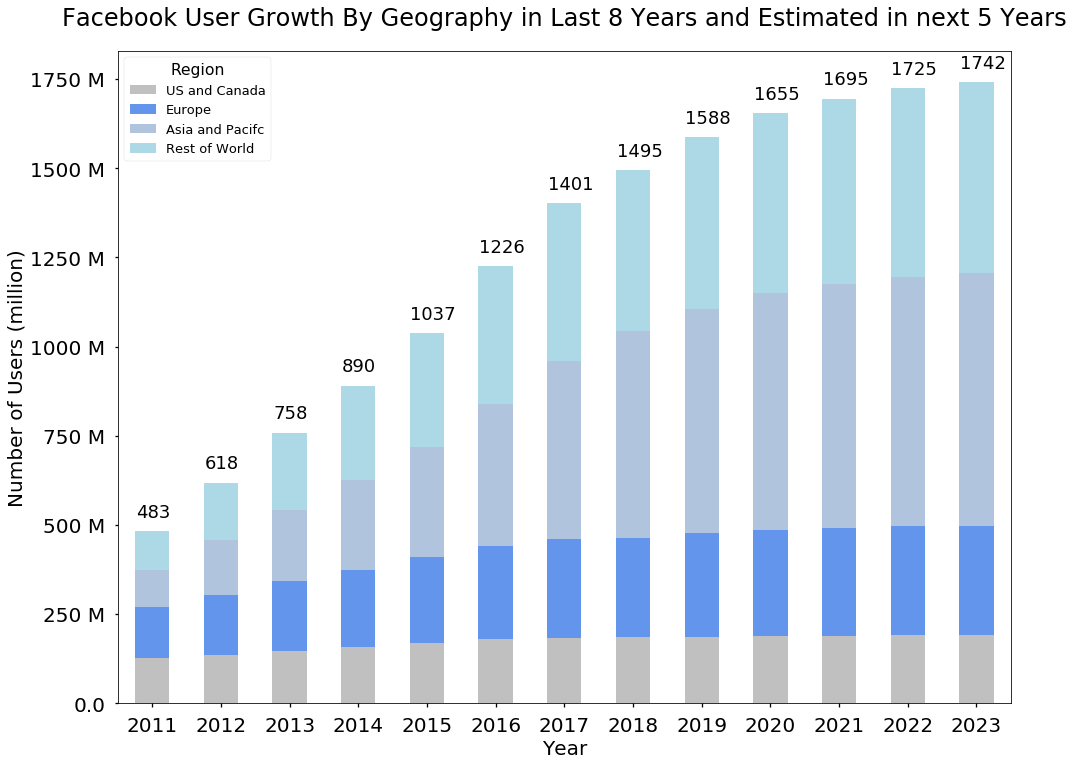

In [367]:
ax = dataset.T.plot.bar(stacked=True, color = ('silver','cornflowerblue','lightsteelblue','lightblue'),figsize=(16,12))
#ax.annotate('x',xy=(2015,1000))
plt.xticks(rotation=0)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of Users (million)", fontsize=20)
plt.title("Facebook User Growth By Geography in Last 8 Years and Estimated in next 5 Years", fontsize = 24, y = 1.03)
ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
ax.yaxis.set_major_formatter(tick.FuncFormatter(y_fmt))
bottom = np.cumsum(dataset, axis=0)
# for i, v in enumerate(dataset.iloc[0,:]):
#     ax.text(i-0.17, v-70, str(round(v)),fontsize=12)
# for i, v in enumerate(dataset.iloc[1,:]):
#     ax.text(i-0.17, v+bottom.iloc[0,i]-80, str(round(v)),fontsize=12)
# for i, v in enumerate(dataset.iloc[2,:]):
#     ax.text(i-0.17, v+bottom.iloc[1,i]-80, str(round(v)),fontsize=12)
# for i, v in enumerate(dataset.iloc[3,:]):
#     ax.text(i-0.17, v+bottom.iloc[2,i]-80, str(round(v)),fontsize=12)
for i, v in enumerate(bottom.iloc[3,:]):
    ax.text(i-0.24, v+40, str(round(v)),fontsize=18);